In [226]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [227]:
#display maximum column and rows
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [228]:
#df = pd.read_clipboardcsv("hands_on_data.csv").drop(columns=['organization_email','event_name'])
df = pd.read_excel("hands_on.xlsx", sheet_name='Sheet1')

In [229]:
df.head()

,id_event,invoice_date,Sold,Transaction,event_start_date,event_end_date,status_event,Ratio
0,5016,2018-09-10,2555,2555.0,2018-12-09,2018-12-09,Past Event,0.174224
1,5016,2018-09-11,2308,2308.0,2018-12-09,2018-12-09,Past Event,0.157382
2,5016,2018-09-12,1328,780.0,2018-12-09,2018-12-09,Past Event,0.090556
3,5016,2018-09-13,1290,306.0,2018-12-09,2018-12-09,Past Event,0.087965
4,5016,2018-09-14,1176,204.0,2018-12-09,2018-12-09,Past Event,0.080191


In [230]:
#check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
id_event            210 non-null int64
invoice_date        210 non-null datetime64[ns]
Sold                210 non-null int64
Transaction         210 non-null float64
event_start_date    210 non-null datetime64[ns]
event_end_date      210 non-null datetime64[ns]
status_event        210 non-null object
Ratio               210 non-null float64
dtypes: datetime64[ns](3), float64(2), int64(2), object(1)
memory usage: 13.2+ KB


In [231]:
#check the data
df.head()

,id_event,invoice_date,Sold,Transaction,event_start_date,event_end_date,status_event,Ratio
0,5016,2018-09-10,2555,2555.0,2018-12-09,2018-12-09,Past Event,0.174224
1,5016,2018-09-11,2308,2308.0,2018-12-09,2018-12-09,Past Event,0.157382
2,5016,2018-09-12,1328,780.0,2018-12-09,2018-12-09,Past Event,0.090556
3,5016,2018-09-13,1290,306.0,2018-12-09,2018-12-09,Past Event,0.087965
4,5016,2018-09-14,1176,204.0,2018-12-09,2018-12-09,Past Event,0.080191


In [232]:
#check categorical type
df.groupby('status_event')['id_event'].unique()

status_event
Active Event          [21450]
Past Event      [5016, 11179]
Name: id_event, dtype: object

In [233]:
# Extract event needed
event_A = df[df.id_event == 5016].reset_index()
event_B = df[df.id_event == 11179].reset_index()
event_C = df[df.id_event == 21450].reset_index()

Text(0, 0.5, 'Ratio')

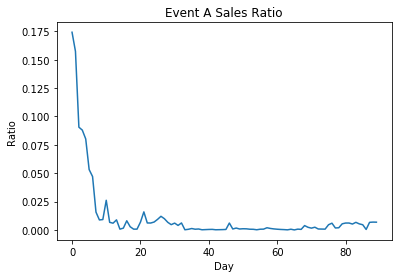

In [234]:
event_A.Ratio.plot.line(title='Event A Sales Ratio')
plt.xlabel('Day')
plt.ylabel('Ratio')

Text(0, 0.5, 'Ratio')

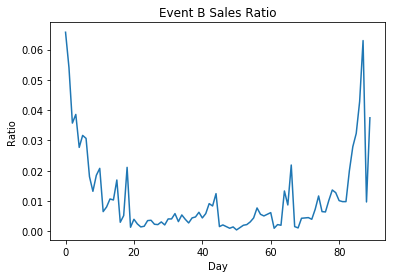

In [235]:
event_B.Ratio.plot.line(title='Event B Sales Ratio')
plt.xlabel('Day')
plt.ylabel('Ratio')

Text(0, 0.5, 'Ratio')

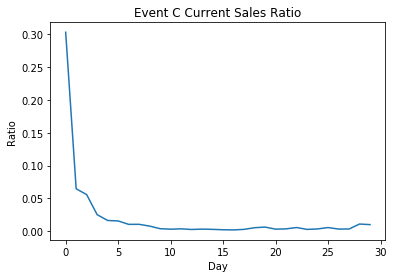

In [236]:
event_C.Ratio.plot.line(title='Event C Current Sales Ratio' )
plt.xlabel('Day')
plt.ylabel('Ratio')